In [233]:
# Załadowanie bibliotek, oraz danych

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
%matplotlib inline

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [234]:
# Dodanie kolumny z rodzajem kwiatu

df['target'] = iris.target

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [235]:
# Podzielenie danych na X i y

X = df.drop(['variety'], axis=1)
y = df['variety']

In [236]:
# Przeskalowanie danych

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_scaled = scaler.fit_transform(X)

In [237]:
# Podzielenie danych na dane treningowe, oraz na dane testowe

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3)

X_train.shape, X_test.shape

((105, 4), (45, 4))

In [238]:
# Nakarmienie modelu danymi treningowymi

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [239]:
# Wykonanie przewidywań na wyuczonym modelu

y_pred = gnb.predict(X_test)

In [240]:
# Sprawdzenie dokładności, oraz testowanie czy istnieje overfitting lub underfitting

from sklearn.metrics import accuracy_score


print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))


Training set score: 0.9524
Test set score: 0.9556


In [241]:
# Obliczenie precyzji modelu

from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average=None)

print("Precyzja dla każdej klasy:", precision)

Precyzja dla każdej klasy: [1.     0.9    0.9375]


<Axes: >

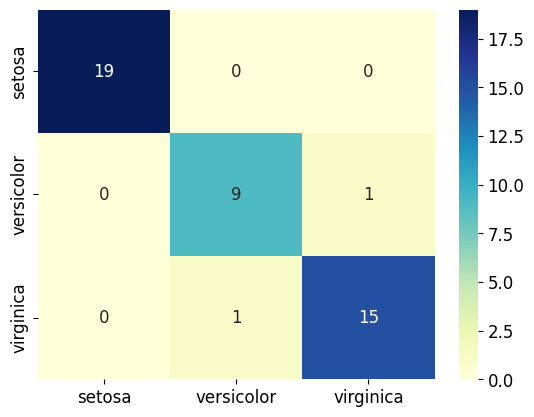

In [242]:
# Wykorzystanie macierzy konfuzji do narysowania wykresu ciepłowego

from sklearn.metrics import confusion_matrix

class_names = iris.target_names

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=class_names, index=class_names)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [243]:
# Zapisanie pierwszych 10 prawdopodobieństw do dataframe'u

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=[class_names])

y_pred_prob_df

,setosa,versicolor,virginica
0,8.730805e-228,3.635048e-12,1.000000e+00
1,5.668687e-78,9.713804e-01,2.861962e-02
2,1.668302e-90,5.460066e-01,4.539934e-01
3,6.751660e-83,9.879105e-01,1.208954e-02
4,2.668907e-168,1.202913e-07,9.999999e-01
5,3.539823e-258,2.569625e-15,1.000000e+00
6,7.391811e-93,6.519583e-01,3.480417e-01
7,6.474841e-81,9.980325e-01,1.967496e-03
8,1.000000e+00,1.070062e-19,4.620106e-29
9,3.114080e-108,5.365866e-01,4.634134e-01


Text(0, 0.5, 'Liczba próbek')

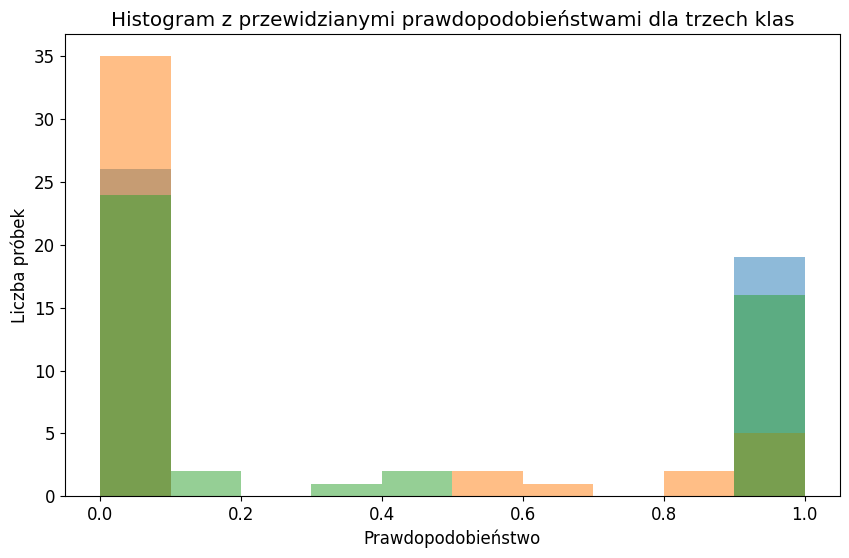

In [244]:
# Przypisz prawdopodobieństwa i narysuj wykresy

y_pred_setosa = gnb.predict_proba(X_test)[:, 0]
y_pred_versicolor = gnb.predict_proba(X_test)[:, 1]
y_pred_virginica = gnb.predict_proba(X_test)[:, 2]

plt.rcParams['font.size'] = 12

plt.figure(figsize=(10, 6))

plt.hist(y_pred_setosa, bins=10, alpha=0.5, label='Setosa')

plt.hist(y_pred_versicolor, bins=10, alpha=0.5, label='Versicolor')

plt.hist(y_pred_virginica, bins=10, alpha=0.5, label='Virginica')

plt.title('Histogram z przewidzianymi prawdopodobieństwami dla trzech klas')
plt.xlabel('Prawdopodobieństwo')
plt.ylabel('Liczba próbek')

